<a href="https://colab.research.google.com/github/janeeeeverdad/Verdad/blob/main/Exer6_1(Verdad).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 104

**Verdad, Jane Benneth Dione**

**BSCS-IS-3B**

**March 06, 2024**

**LOGISTIC REGRESSION: TITANIC DATA**

1. Import Libraries

In [ ]:
import pandas as pd
import seaborn as sne
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

2. Loading Data

In [ ]:
titanic = pd.read_csv ('titanic_data.csv')

3. Data Analysis

Text(0.5, 1.0, 'Distribution of Passenger who Survived')

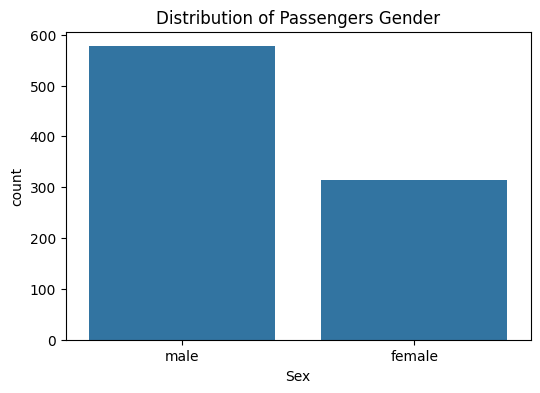

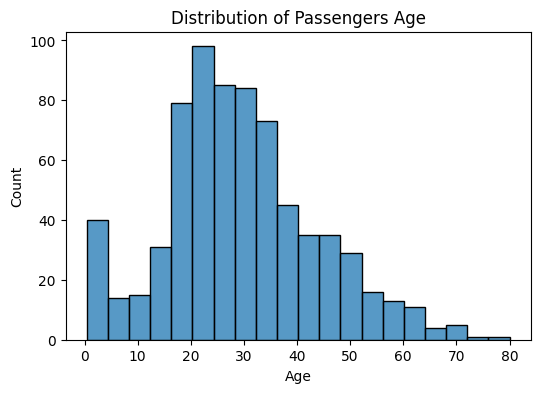

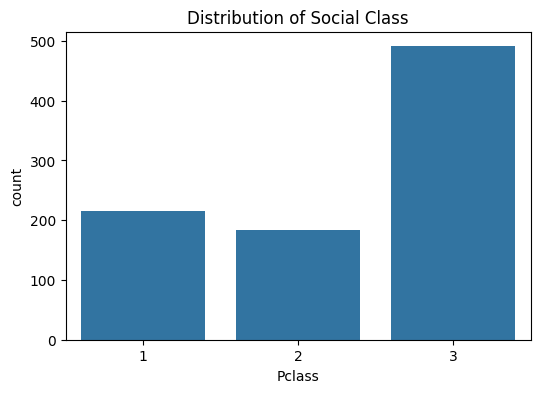

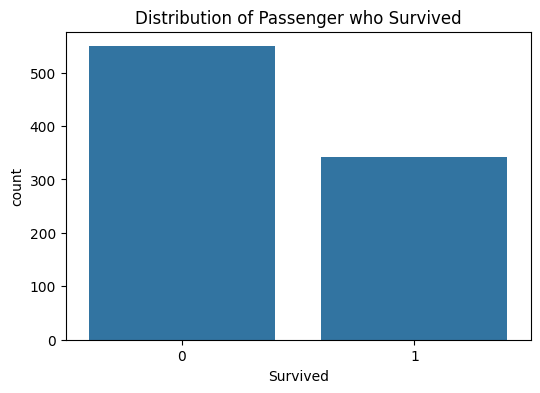

In [ ]:
#Gender
plt.figure(figsize = (6, 4))
sne.countplot(data=titanic, x='Sex')
plt.title('Distribution of Passengers Gender')

#Age
plt.figure(figsize = (6, 4))
sne.histplot(data=titanic, x='Age')
plt.title('Distribution of Passengers Age')

#PClass
plt.figure(figsize = (6, 4))
sne.countplot(data=titanic, x='Pclass')
plt.title('Distribution of Social Class')

#Survived
plt.figure(figsize = (6, 4))
sne.countplot(data=titanic, x='Survived')
plt.title('Distribution of Passenger who Survived')

4. Preprocess Data

In [ ]:
indep = ['Pclass', 'Sex', 'Age']
dep = 'Survived'

#Separating X and y
X = titanic[indep]
Y = titanic[dep]

#Handling missing values and encoding categorical variables
numeric_features = ['Age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

5. Splitting Data into Training and Testing Sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

6. Logistic Regression Model

In [ ]:
#Creating the logistic regression pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

#Fitting the model
clf.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex'])])),
                ('classifier', LogisticRegression())])

7. Predictions

In [ ]:
#Predictions
Y_predict= clf.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(Y_test, Y_predict)
conf_matrix = confusion_matrix(Y_test, Y_predict)
class_report = classification_report(Y_test, Y_predict)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')


Accuracy: 0.8044692737430168
Confusion Matrix: 
[[91 14]
 [21 53]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

